In [172]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import time
analyzer = SentimentIntensityAnalyzer()

In [173]:
# Set up Tweepy API Authentication
from wusiapikeys import twitter_plotbot
consumer_key= twitter_plotbot["consumer_key"]
consumer_secret= twitter_plotbot["consumer_secret"]
access_token= twitter_plotbot["access_token"]
access_token_secret= twitter_plotbot["access_token_secret"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [174]:
# read the team name from file
team_pd=pd.read_excel("Resources/MLS_2017_Attendance.xlsx","MLS",index_col="Rank")
team_list = team_pd["Team"].tolist()

teams=['Atlanta United FC',
 'Seattle Sounders',
 'Toronto FC',
 'Orlando City',
 'New York City FC',
 'Los Angeles Galaxy',
 'Vancouver Whitecaps',
 'New York Red Bulls',
 'Portland Timbers',
 'Minnesota United FC',
 'Impact de Montréal',
 'San Jose Earthquakes',
 'Sporting Kansas City',
 'New England Revolution',
 'Real Salt Lake',
 'D.C. United',
 'Houston Dynamo',
 'Chicago Fire',
 'Philadelphia Union',
 'Columbus Crew',
 'Colorado Rapids',
 'FC Dallas']

hash_tags ={'Atlanta United FC':["#ATLUTD"],
  'Seattle Sounders':["#Sounders"],
 'Toronto FC':["#TFC"],
 'Orlando City':["#OCSC"],
 'New York City FC':["#NYCFC"],
 'Los Angeles Galaxy':["#LAGalaxy"],
 'Vancouver Whitecaps':["#VWFC"],
 'New York Red Bulls':["#RBNY"],
 'Portland Timbers':["#PTFC"],
 'Minnesota United FC':["#MNUFC"],
 'Impact de Montréal':["#IMFC"],
 'San Jose Earthquakes':["#SJEartquakes"],
 'Sporting Kansas City':["#SportingKC"],
 'New England Revolution':["#NERevs"],
 'Real Salt Lake':["#RSL"],
 'D.C. United':["#DCU"],
 'Houston Dynamo':["#HoustonDynamo","#foreverorange"],
 'Chicago Fire':["#cf97"],
 'Philadelphia Union':["#DOOP","#PhiladelphiaUnion"],
 'Columbus Crew':["#SaveTheCrew","#CrewSC","#Crew96"],
 'Colorado Rapids':["#Rapids96"],
 'FC Dallas':["#FCDallas"]}

In [175]:
## team name list
teams=['Atlanta United FC', 'Seattle Sounders', 'Toronto FC', 'Orlando City', 'New York City FC', 'Los Angeles Galaxy', 'Vancouver Whitecaps', 'New York Red Bulls', 'Portland Timbers', 'Minnesota United FC', 'Impact de Montréal', 'San Jose Earthquakes', 'Sporting Kansas City', 'New England Revolution', 'Real Salt Lake', 'D.C. United', 'Houston Dynamo', 'Chicago Fire', 'Philadelphia Union', 'Columbus Crew', 'Colorado Rapids', 'FC Dallas']

## team name: hash_tags dictionary
hash_tags ={'Atlanta United FC':["#ATLUTD"], 'Seattle Sounders':["#Sounders"], 'Toronto FC':["#TFC"], 'Orlando City':["#OCSC"], 'New York City FC':["#NYCFC"], 'Los Angeles Galaxy':["#LAGalaxy"], 'Vancouver Whitecaps':["#VWFC"], 'New York Red Bulls':["#RBNY"], 'Portland Timbers':["#PTFC"], 'Minnesota United FC':["#MNUFC"], 'Impact de Montréal':["#IMFC"], 'San Jose Earthquakes':["#Quakes74"], 'Sporting Kansas City':["#SportingKC"], 'New England Revolution':["#NERevs"], 'Real Salt Lake':["#RSL"], 'D.C. United':["#DCU"], 'Houston Dynamo':["#HoustonDynamo","#foreverorange"], 'Chicago Fire':["#cf97"], 'Philadelphia Union':["#DOOP","#PhiladelphiaUnion"], 'Columbus Crew':["#SaveTheCrew","#CrewSC","#Crew96"], 'Colorado Rapids':["#Rapids96"], 'FC Dallas':["#FCDallas"]}

In [176]:
# define function for search hashtag and conduct sentimental analysis
# return the average sentimental analysis score for all hash tags
def senti_analysis(hash_tags=[]):
    
    senti_score=[] #initialize score list
    count_of_tweets=0
    
    for hash_tag in hash_tags:
        print(hash_tag)
        
        last_id=None #initialize last id searched
        
        for i in range(1,6): ## do 5 searches for each hash tag
            print(f"search{i}------------------------------------------------------------------")
            try:
                public_tweets = api.search(q=hash_tag,count=100,max_id=last_id)["statuses"] ## search 100 tweets per search
                #print(f"{len(public_tweets)}")
                print(f"last twitter tweeted at {public_tweets[0]['created_at']}")

                last_id=public_tweets[-1]["id"] # get the last id for next search
                
                if i==1:
                    latest_twitter = public_tweets[0]["created_at"] 
                
                earliest_twitter = public_tweets[-1]["created_at"] 
                
                count_of_tweets += len(public_tweets)

                for tweet in public_tweets:
                    result = analyzer.polarity_scores(tweet["text"])
                    senti_score.append(result["compound"])
                    
            except Exception as e:
                print(f"error: {e}")

            time.sleep(1) #pause for 1 second
    
    return np.mean(senti_score),count_of_tweets,latest_twitter,earliest_twitter
            


In [177]:
senti_score_ls=[] # initialize a list to store sentimental analysis result for all teams

for team in teams:
    team_hash_tag = hash_tags[team]
    #print(team_hash_tag)
    
    senti_score,count_of_tweets,latest_twitter,earliest_twitter = senti_analysis(team_hash_tag)
    
    senti_score_ls.append({"team name":team,
                           "average polarity score":senti_score,
                           "number of tweets":count_of_tweets,
                           "from":earliest_twitter,
                           "to":latest_twitter,}) 

#ATLUTD
search1------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 18:25:03 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 15:15:15 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 04:15:34 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Mon Jul 23 23:00:27 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Mon Jul 23 17:14:13 +0000 2018
#Sounders
search1------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 18:01:26 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Sun Jul 22 20:18:22 +0000 2018
search3------------------------------------------------------------------
last 

search4------------------------------------------------------------------
last twitter tweeted at Thu Jul 19 02:34:53 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Thu Jul 19 00:53:47 +0000 2018
#NERevs
search1------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 18:25:25 +0000 2018
search2------------------------------------------------------------------
last twitter tweeted at Tue Jul 24 12:09:10 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Mon Jul 23 22:51:00 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Mon Jul 23 20:59:31 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Mon Jul 23 15:44:43 +0000 2018
#RSL
search1------------------------------------------------------------------
last twitt

last twitter tweeted at Mon Jul 23 21:51:27 +0000 2018
search3------------------------------------------------------------------
last twitter tweeted at Mon Jul 23 12:35:17 +0000 2018
search4------------------------------------------------------------------
last twitter tweeted at Sun Jul 22 07:51:41 +0000 2018
search5------------------------------------------------------------------
last twitter tweeted at Sun Jul 22 01:15:59 +0000 2018


In [178]:
# convert the result into panda dataframe
senti_score_df = pd.DataFrame(senti_score_ls)

#set index
senti_score_df.set_index("team name",inplace=True)
senti_score_df = senti_score_df[["average polarity score","number of tweets","from","to"]]

#add hash tag to the table
hash_tag_df = pd.Series(hash_tags,name="hash tag").to_frame()
hash_tag_df

final_df=senti_score_df.merge(hash_tag_df,right_index=True,left_index=True)
final_df

,average polarity score,number of tweets,from,to,hash tag
team name,,,,,
Atlanta United FC,0.160467,500,Mon Jul 23 11:23:58 +0000 2018,Tue Jul 24 18:25:03 +0000 2018,[#ATLUTD]
Seattle Sounders,0.191550,500,Wed Jul 18 16:02:31 +0000 2018,Tue Jul 24 18:01:26 +0000 2018,[#Sounders]
Toronto FC,0.073817,500,Mon Jul 23 08:39:18 +0000 2018,Tue Jul 24 18:19:42 +0000 2018,[#TFC]
Orlando City,-0.084376,500,Sun Jul 22 02:39:41 +0000 2018,Tue Jul 24 18:18:15 +0000 2018,[#OCSC]
New York City FC,0.342370,500,Mon Jul 23 16:59:18 +0000 2018,Tue Jul 24 18:28:12 +0000 2018,[#NYCFC]
Los Angeles Galaxy,0.112540,500,Sun Jul 22 14:04:43 +0000 2018,Tue Jul 24 18:27:26 +0000 2018,[#LAGalaxy]
Vancouver Whitecaps,0.154514,500,Sun Jul 22 04:45:50 +0000 2018,Tue Jul 24 18:29:04 +0000 2018,[#VWFC]
New York Red Bulls,0.080284,500,Mon Jul 23 00:22:29 +0000 2018,Tue Jul 24 18:27:59 +0000 2018,[#RBNY]
Portland Timbers,0.117219,409,Sat Jul 14 14:26:35 +0000 2018,Tue Jul 24 18:02:11 +0000 2018,[#PTFC]


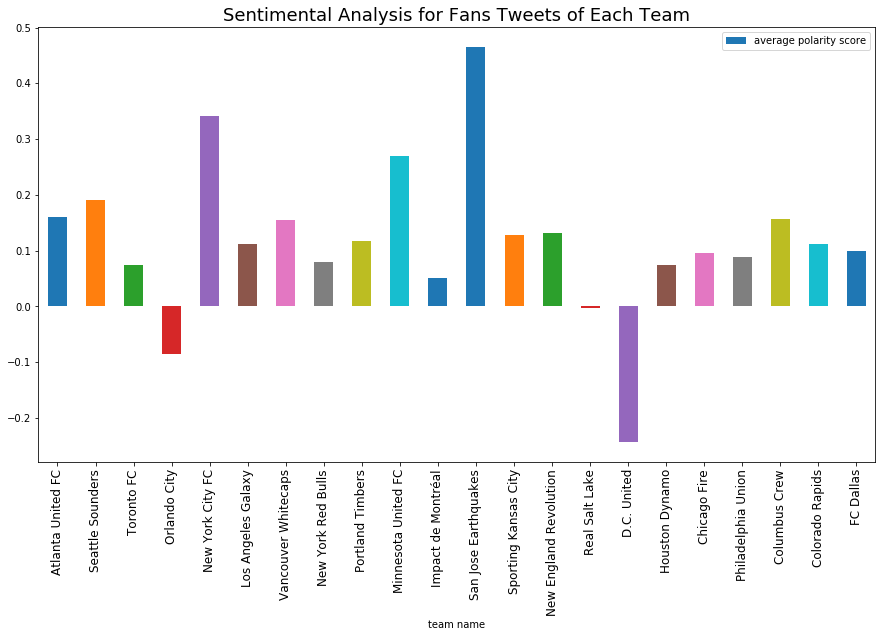

In [179]:
final_df.plot(kind="bar",y="average polarity score",figsize=(15,8))
plt.xticks(fontsize=12)
plt.title("Sentimental Analysis for Fans Tweets of Each Team",fontsize=18)

plt.savefig("Sentimental_Analysis_Result.png")

In [180]:
#export result to csv file
final_df.to_csv("sentimental analysis result.csv")